In [672]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [673]:
# import the dataset to train and evaluate the model
df = [] #for PCA features
df.append(pd.read_csv(r"our_input_30/global_pca4.csv"))
# df.append(pd.read_csv(r"our_input_subject2/global_pca4.csv"))
for dfs in df:
    dfs.columns = list(range(len(dfs.columns)))
df= pd.concat([dfs for dfs in df], axis=0).reset_index(drop=True)

In [674]:
# extraction for features 4PC
# 217 is the lenght of the initial dataset without the new dataset added
X = df.drop(4,axis=1)
X=X.iloc[:217,:]
y = df.iloc[:217,4]             # output required

#extraction for mixed serie
X_mix = df.drop(4,axis=1)
X_mix=X_mix.iloc[217:,:]
y_mix = df.iloc[217:,4]             # output required


In [675]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

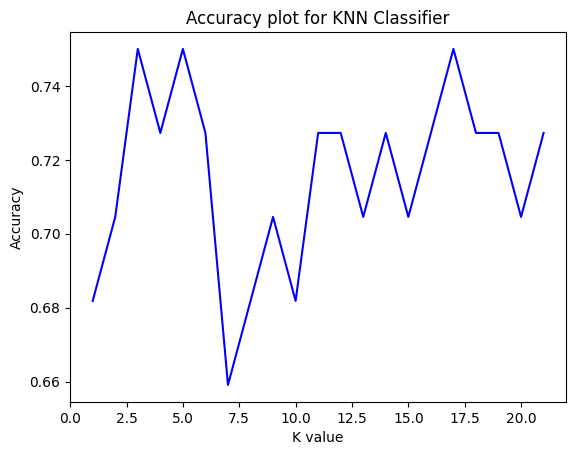

In [676]:
# Test classifier 1 : k-NN
from sklearn.neighbors import KNeighborsClassifier # applying KNN for classification
k_value = [] 
k_accuracy = []

for i in range(1,22):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    
    score = knn.score(X_test,y_test)
    k_value.append(i)
    k_accuracy.append(score)
# for i,j in zip(k_value,k_accuracy):
    # print(i,j)

#Finding k for max acc
plt.plot(range(1,22),k_accuracy,color = "blue")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Accuracy plot for KNN Classifier")
plt.show()

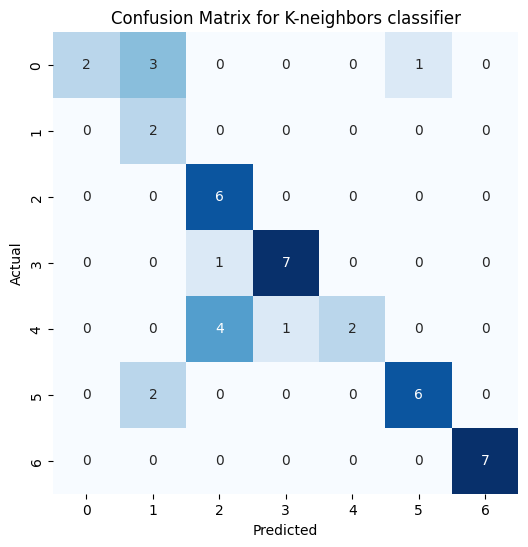

In [677]:
y_pred=knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for K-neighbors classifier")
plt.show()


In [678]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.33      0.50         6
         1.0       0.29      1.00      0.44         2
         2.0       0.55      1.00      0.71         6
         3.0       0.88      0.88      0.88         8
         4.0       1.00      0.29      0.44         7
         5.0       0.86      0.75      0.80         8
         6.0       1.00      1.00      1.00         7

    accuracy                           0.73        44
   macro avg       0.79      0.75      0.68        44
weighted avg       0.86      0.73      0.72        44



In [679]:
# test classifier 2 : a bagging classifier - Random Forest
from sklearn.ensemble import RandomForestClassifier  # applying random forest for classification
from sklearn.metrics import accuracy_score
rf_params = None

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)
accuracy_score(y_test,y_pred)

0.7272727272727273

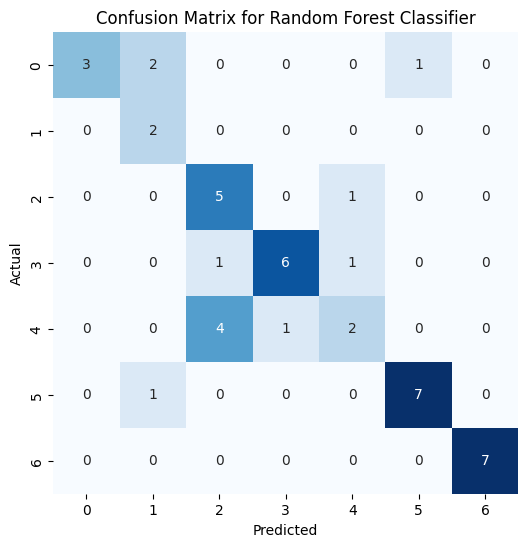

In [680]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

In [681]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         6
         1.0       0.40      1.00      0.57         2
         2.0       0.50      0.83      0.62         6
         3.0       0.86      0.75      0.80         8
         4.0       0.50      0.29      0.36         7
         5.0       0.88      0.88      0.88         8
         6.0       1.00      1.00      1.00         7

    accuracy                           0.73        44
   macro avg       0.73      0.75      0.70        44
weighted avg       0.78      0.73      0.72        44



In [682]:
# predict the classes for the new dataset with RF classifier
y_pred_mix = rf.predict(X_mix)
print(y_pred_mix)
accuracy_score(y_mix,y_pred_mix)
df = pd.DataFrame(y_pred_mix)
print(accuracy_score(y_mix,y_pred_mix))
df.to_csv(r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_codes\our_input_subject2\results_pca4.csv", index=False, header=False)

[3. 3. 3. 3. 3. 3. 3. 3. 0. 3. 0. 3. 3. 3. 3. 3. 3. 3. 3. 2. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 0. 3. 3. 1.]
0.09090909090909091


In [683]:
# Test classifier 3 : boosting classifier - CatBoost Classifier
from catboost import CatBoostClassifier  # applying cat boost for classification

cat=CatBoostClassifier(silent=True).fit(X_train,y_train)

y_pred=cat.predict(X_test)
y_pred_proba = cat.predict_proba(X_test)
accuracy_score(y_test,y_pred)

0.8181818181818182

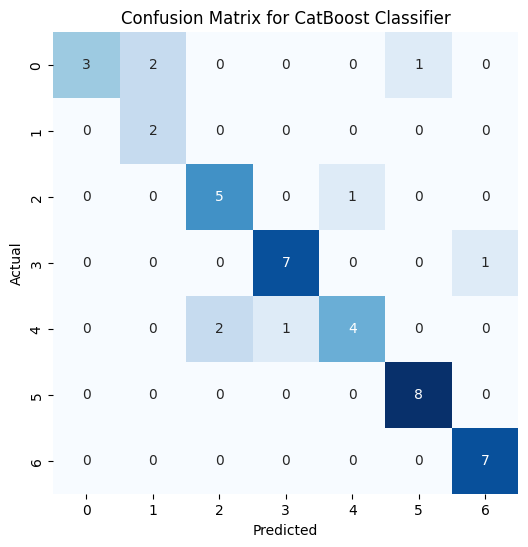

In [684]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for CatBoost Classifier")
plt.show()


In [685]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         6
         1.0       0.50      1.00      0.67         2
         2.0       0.71      0.83      0.77         6
         3.0       0.88      0.88      0.88         8
         4.0       0.80      0.57      0.67         7
         5.0       0.89      1.00      0.94         8
         6.0       0.88      1.00      0.93         7

    accuracy                           0.82        44
   macro avg       0.81      0.83      0.79        44
weighted avg       0.84      0.82      0.81        44



In [686]:
# predict the mix movement serie with CatBoost
y_pred_mix = cat.predict(X_mix)
accuracy_score(y_mix,y_pred_mix)
df = pd.DataFrame(y_pred_mix)
print(accuracy_score(y_mix,y_pred_mix))

0.09090909090909091
